<font size="+3"><strong>3.2. Linear Regression with Time Series Data</strong></font>

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from pprint import PrettyPrinter
import plotly.express as px
import pytz
from IPython.display import VimeoVideo
from pymongo import MongoClient
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [37]:
VimeoVideo("665412117", h="c39a50bd58", width=600)

<div style="padding: 1em; border: 1px solid #f0ad4e; border-left: 6px solid #f0ad4e; background-color: #fcf8e3; color: #8a6d3b; border-radius: 4px;">

<strong>🛠️ Instruction:</strong> Locate the IP address of the machine running MongoDB and assign it to the variable <code>host</code>. Make sure to use a <strong>string</strong> (i.e., wrap the IP in quotes).<br><br>

<strong>⚠️ Note:</strong> The IP address is <strong>dynamic</strong> — it may change every time you start the lab. Always check the current IP before proceeding.

</div>

<img src="../images/mongo_ip.png" alt="MongoDB" width="600"/>


In [38]:
host = "192.130.166.2"

# Prepare Data

## Import

In [39]:
VimeoVideo("665412469", h="135f32c7da", width=600)

**Task 3.2.1:** Complete to the create a client to connect to the MongoDB server running at `host` on port `27017`, assign the `"air-quality"` database to `db`, and assign the `"nairobi"` connection to `nairobi`.

- [<span id='technique'>Create a client object for a <span id='tool'>MongoDB</span> instance.](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients) 
- [<span id='technique'>Access a database using <span id='tool'>PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients)
- [<span id='technique'>Access a collection in a database using <span id='tool'>PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Collections)

In [40]:
pp =PrettyPrinter(indent=2)


In [41]:
from pprint import pprint
client = MongoClient(host="192.193.194.2", port=27017)
db=client["air-quality"]
nairobi=db["nairobi"]
nairobi

Collection(Database(MongoClient(host=['192.193.194.2:27017'], document_class=dict, tz_aware=False, connect=True), 'air-quality'), 'nairobi')

In [42]:
VimeoVideo("665412480", h="c20ed3e570", width=600)

**Task 3.2.2:** Complete the `wrangle` function below so that the `results` from the database query are read into the DataFrame `df`. Be sure that the index of `df` is the `"timestamp"` from the results. 

- [<span id='technique'>Create a DataFrame from a dictionary using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [43]:
def wrangle(collection):
    results = collection.find(
        {"metadata.site": 29, "metadata.measurement": "P2"},
      
        projection={"P2": 1,"timestamp": 1,"_id": 0},
    )

    df =pd.DataFrame(results).set_index("timestamp")
    df.index=df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")
    df = df[df["P2"] < 500]

    df=df["P2"].resample("1H").mean().fillna(method="ffill").to_frame()
    #create a column by lag
    df["P2.L1"]=df["P2"].shift(1)
    df.dropna(inplace=True)
    return df

In [44]:
VimeoVideo("665412496", h="d757475f7c", width=600)

**Task 3.2.3:** Use your wrangle function to read the data from the `nairobi` collection into the DataFrame `df`.

In [45]:
df = wrangle(nairobi)

df.head()
df.shape

(2927, 2)

In [46]:
# Check your work
assert any([isinstance(df, pd.DataFrame), isinstance(df, pd.Series)])
assert len(df) <= 32907
assert isinstance(df.index, pd.DatetimeIndex)

In [47]:
VimeoVideo("665412520", h="e03eefff07", width=600)

**Task 3.2.4:** Add to your `wrangle` function so that the `DatetimeIndex` for `df` is localized to the correct timezone, `"Africa/Nairobi"`. Don't forget to re-run all the cells above after you change the function. 

- [<span id='technique'>Localize a timestamp to another timezone using <span id='tool'>pandas.](../%40textbook/18-ts-models.ipynb#Localizing-the-Timezone)

In [48]:
# Check your work
assert df.index.tzinfo == pytz.timezone("Africa/Nairobi")

## Explore

In [49]:
VimeoVideo("665412546", h="97792cb982", width=600)

**Task 3.2.5:** Create a boxplot of the `"P2"` readings in `df`. 

- [<span id='technique'>Create a boxplot using <span id='tool'>pandas.](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)

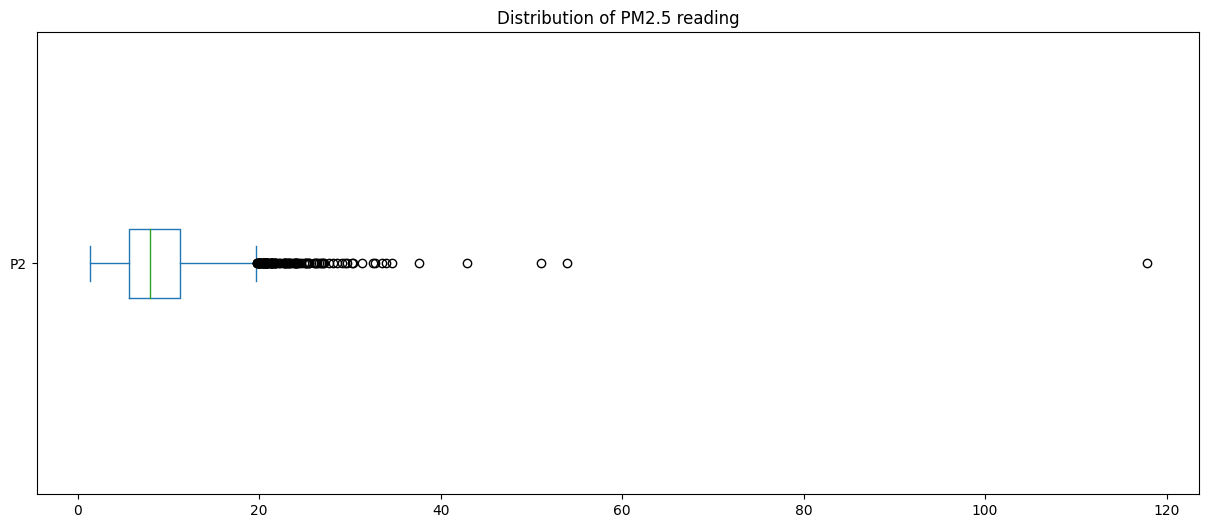

In [50]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].plot(kind="box",vert=False,title="Distribution of PM2.5 reading",ax=ax);



In [51]:
VimeoVideo("665412573", h="b46049021b", width=600)

**Task 3.2.6:** Add to your `wrangle` function so that all `"P2"` readings above 500 are dropped from the dataset. Don't forget to re-run all the cells above after you change the function. 

- [<span id='technique'>Subset a DataFrame with a mask using <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Subsetting-with-Masks)

In [52]:

df[df["P2"]<500]


,P2,P2.L1
timestamp,,
2018-09-01 04:00:00+03:00,15.800000,17.541667
2018-09-01 05:00:00+03:00,11.420000,15.800000
2018-09-01 06:00:00+03:00,11.614167,11.420000
2018-09-01 07:00:00+03:00,17.665000,11.614167
2018-09-01 08:00:00+03:00,21.016667,17.665000
...,...,...
2018-12-31 22:00:00+03:00,7.060833,9.150833
2018-12-31 23:00:00+03:00,7.854167,7.060833
2019-01-01 00:00:00+03:00,9.755833,7.854167


In [53]:
# Check your work
assert len(df) <= 32906

In [54]:
VimeoVideo("665412594", h="e56c2f6839", width=600)

**Task 3.2.7:** Create a time series plot of the `"P2"` readings in `df`.

- [<span id='technique'>Create a line plot using <span id='tool'>pandas.](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)

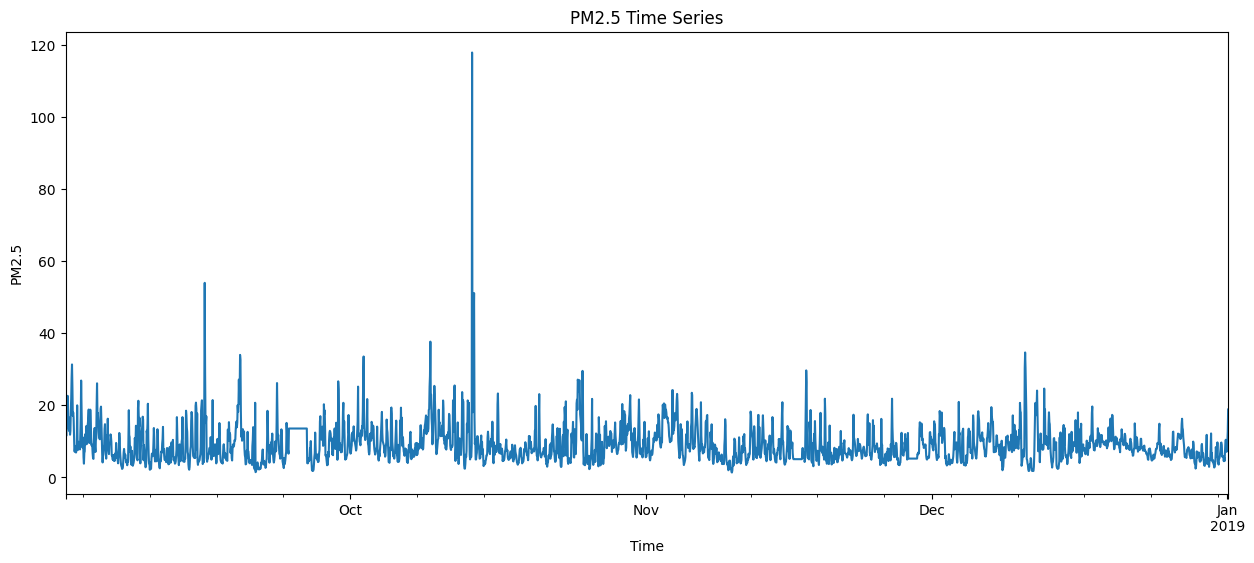

In [55]:
import matplotlib.pyplot as plt  

fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].plot(xlabel="Time", ylabel="PM2.5", title="PM2.5 Time Series", ax=ax)
plt.show()  



In [56]:
VimeoVideo("665412601", h="a16c5a73fc", width=600)

**Task 3.2.8:** Add to your `wrangle` function to resample `df` to provide the mean `"P2"` reading for each hour. Use a forward fill to impute any missing values. Don't forget to re-run all the cells above after you change the function. 

- [<span id='technique'>Resample time series data in <span id='tool'>pandas.](../%40textbook/18-ts-models.ipynb#Resampling-Data)
- [<span id='technique'>Impute missing time series values using <span id='tool'>pandas.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Imputation)

In [57]:

df["P2"].resample("1H").mean().fillna(method="ffill").to_frame().head()
df.shape

(2927, 2)

In [58]:
# Check your work
assert len(df) <= 2928

In [59]:
VimeoVideo("665412649", h="d2e99d2e75", width=600)

**Task 3.2.9:** Plot the rolling average of the `"P2"` readings in `df`. Use a window size of `168` (the number of hours in a week).

- [What's a rolling window?](../%40textbook/17-ts-core.ipynb#Rolling-Averages)
- [Do a rolling window calculation in pandas.](../%40textbook/18-ts-models.ipynb#Making-a-Line-Plot-with-Rolling-Averages)
- [Make a line plot with time series data in pandas.](../%40textbook/18-ts-models.ipynb#Making-a-Line-Plot-with-Rolling-Averages)

In [60]:
df["P2"].rolling(168).mean()

timestamp
2018-09-01 04:00:00+03:00         NaN
2018-09-01 05:00:00+03:00         NaN
2018-09-01 06:00:00+03:00         NaN
2018-09-01 07:00:00+03:00         NaN
2018-09-01 08:00:00+03:00         NaN
                               ...   
2018-12-31 22:00:00+03:00    6.932995
2018-12-31 23:00:00+03:00    6.935927
2019-01-01 00:00:00+03:00    6.938348
2019-01-01 01:00:00+03:00    6.973928
2019-01-01 02:00:00+03:00    7.043333
Freq: H, Name: P2, Length: 2927, dtype: float64

<Axes: title={'center': 'Weekly rolling average'}, xlabel='timestamp', ylabel='PM2.5'>

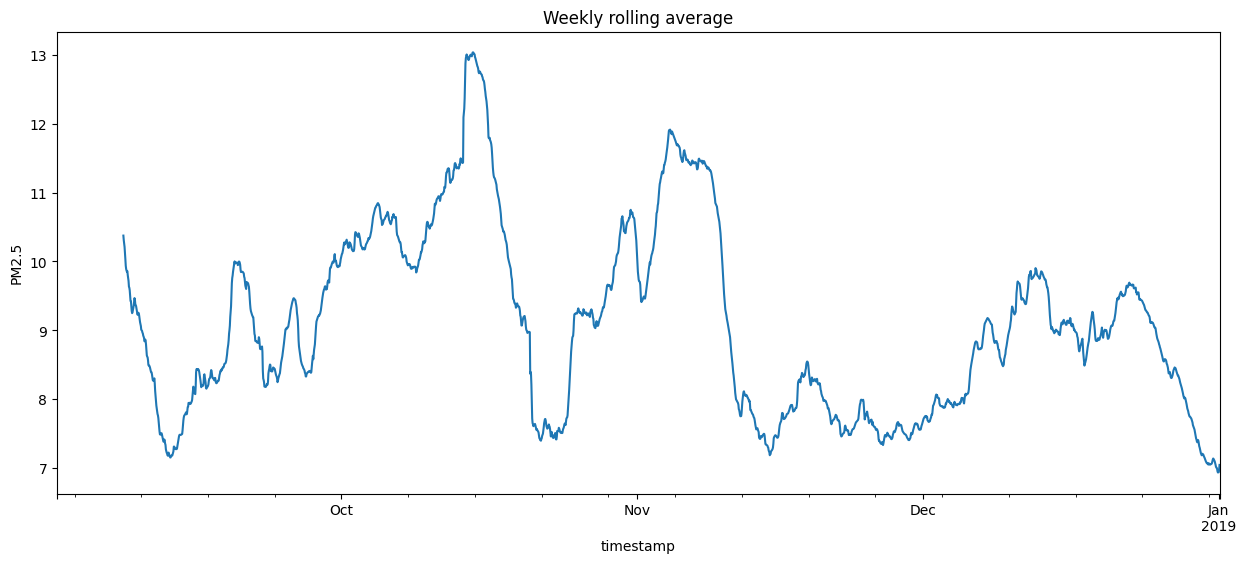

In [61]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].rolling(168).mean().plot(ax=ax,
                                 ylabel="PM2.5",title="Weekly rolling average")


In [62]:
VimeoVideo("665412693", h="c3bca16aff", width=600)

**Task 3.2.10:** Add to your `wrangle` function to create a column called `"P2.L1"` that contains the mean`"P2"` reading from the previous hour. Since this new feature will create `NaN` values in your DataFrame, be sure to also drop null rows from `df`.

- [<span id='technique'>Shift the index of a Series in <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns)
- [<span id='technique'>Drop rows with missing values from a DataFrame using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Dropping-Columns)

In [63]:

df.head()

,P2,P2.L1
timestamp,,
2018-09-01 04:00:00+03:00,15.800000,17.541667
2018-09-01 05:00:00+03:00,11.420000,15.800000
2018-09-01 06:00:00+03:00,11.614167,11.420000
2018-09-01 07:00:00+03:00,17.665000,11.614167
2018-09-01 08:00:00+03:00,21.016667,17.665000


In [69]:
# Check your work
assert len(df) <= 11686
assert df.shape[1] == 2

In [65]:
VimeoVideo("665412732", h="059e4088c5", width=600)

**Task 3.2.11:** Create a correlation matrix for `df`.

- [<span id='technique'>Create a correlation matrix in <span id='tool'>pandas.](../%40textbook/07-visualization-pandas.ipynb#Correlation-Matrices)

In [70]:
df.corr()

,P2,P2.L1
P2,1.000000,0.650679
P2.L1,0.650679,1.000000


In [67]:
VimeoVideo("665412741", h="7439cb107c", width=600)

**Task 3.2.12:** Create a scatter plot that shows PM 2.5 mean reading for each our as a function of the mean reading from the previous hour. In other words, `"P2.L1"` should be on the x-axis, and `"P2"` should be on the y-axis. Don't forget to label your axes!

- [<span id='technique'>Create a scatter plot using <span id='tool'>Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)

Text(0.5, 1.0, 'PM2.5 correlation')

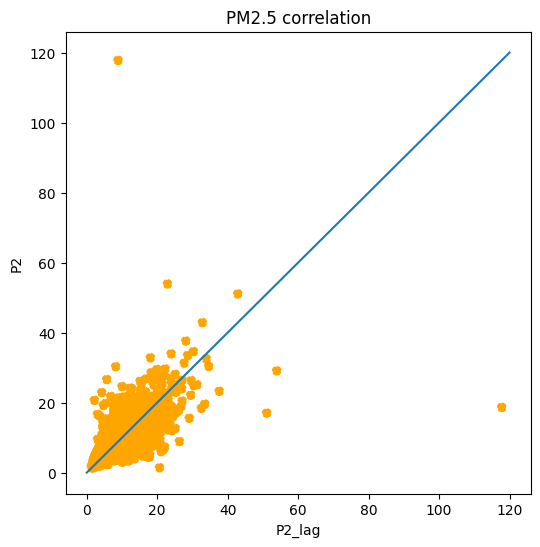

In [72]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x=df["P2.L1"],y=df["P2"],linestyle="--",color="orange")
ax.plot([0,120],[0,120])
plt.xlabel("P2_lag")
plt.ylabel("P2")
plt.title("PM2.5 correlation")



## Split

In [74]:
VimeoVideo("665412762", h="a5eba496f7", width=600)

**Task 3.2.13:** Split the DataFrame `df` into the feature matrix `X` and the target vector `y`. Your target is `"P2"`.

- [<span id='technique'>Subset a DataFrame by selecting one or more columns in <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Subset-a-DataFrame-by-Selecting-One-or-More-Columns) 
- [<span id='technique'>Select a Series from a DataFrame in <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns) 

In [73]:
target = "P2"
y =df[target]
X =df.drop(columns=target)
X.head()

,P2.L1
timestamp,
2018-09-01 04:00:00+03:00,17.541667
2018-09-01 05:00:00+03:00,15.800000
2018-09-01 06:00:00+03:00,11.420000
2018-09-01 07:00:00+03:00,11.614167
2018-09-01 08:00:00+03:00,17.665000


In [75]:
VimeoVideo("665412785", h="03118eda71", width=600)

**Task 3.2.14:** Split `X` and `y` into training and test sets. The first 80% of the data should be in your training set. The remaining 20% should be in the test set.

- [<span id='technique'>Divide data into training and test sets in <span id='tool'>pandas.](../%40textbook/14-ml-classification.ipynb#Randomized-Train-Test-split)

In [86]:
cutoff = int(len(X) * 0.8)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]
len(X_train)+len(X_test)==len(X)


True

In [87]:
int(len(X)*0.8)

2341

# Build Model

## Baseline

**Task 3.2.15:** Calculate the baseline mean absolute error for your model.

- [<span id='technique'>Calculate summary statistics for a DataFrame or Series in <span id='tool'>pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Summary-Statistics)

In [89]:
y_mean=y_train.mean()
y_pred_baseline =[y_train.mean()]*len(y_train)
mae_baseline =mean_absolute_error(y_train,y_pred_baseline)

print("Mean P2 Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 9.27
Baseline MAE: 3.89


## Iterate

**Task 3.2.16:** Instantiate a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model named `model`, and fit it to your training data.

- [<span id='technique'>Instantiate a predictor in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Fitting-a-Model-to-Training-Data)
- [<span id='technique'>Fit a model to training data in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Fitting-a-Model-to-Training-Data)

In [90]:
model =LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

## Evaluate

In [91]:
VimeoVideo("665412844", h="129865775d", width=600)

**Task 3.2.17:** Calculate the training and test mean absolute error for your model.

- [<span id='technique'>Generate predictions using a trained model in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Generating-Predictions-Using-a-Trained-Model)
- [<span id='technique'>Calculate the mean absolute error for a list of predictions in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

In [96]:
training_mae =mean_absolute_error(y_train,model.predict(X_train)) 
test_mae = mean_absolute_error(y_test,model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 2.46
Test MAE: 1.8


# Communicate Results

**Task 3.2.18:** Extract the intercept and coefficient from your `model`. 

- [<span id='technique'>Access an object in a pipeline in <span id='tool'>scikit-learn](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Accessing-an-Object-in-a-Pipeline)<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

In [102]:
intercept =model.intercept_.round(2)
coefficient =model.coef_.round(2)[0]

print(f"P2 = {intercept} + ({coefficient} * P2.L1)")

P2 = 3.36 + (0.64 * P2.L1)


In [98]:
VimeoVideo("665412870", h="318d69683e", width=600)

**Task 3.2.19:** Create a DataFrame `df_pred_test` that has two columns: `"y_test"` and `"y_pred"`. The first should contain the true values for your test set, and the second should contain your model's predictions. Be sure the index of `df_pred_test` matches the index of `y_test`.

- [<span id='technique'>Create a DataFrame from a dictionary using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [103]:
df_pred_test = pd.DataFrame(
    {
        "y_test":y_test,
        "y_pred":model.predict(X_test)
    }
)
df_pred_test.head()

,y_test,y_pred
timestamp,,
2018-12-07 17:00:00+03:00,7.070000,8.478927
2018-12-07 18:00:00+03:00,8.968333,7.865485
2018-12-07 19:00:00+03:00,11.630833,9.076421
2018-12-07 20:00:00+03:00,11.525833,10.774814
2018-12-07 21:00:00+03:00,9.533333,10.707836


In [104]:
VimeoVideo("665412891", h="39d7356a26", width=600)

**Task 3.2.20:** Create a time series line plot for the values in `test_predictions` using plotly express. Be sure that the y-axis is properly labeled as `"P2"`.

- [<span id='technique'>Create a line plot using <span id='tool'>plotly express.](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)

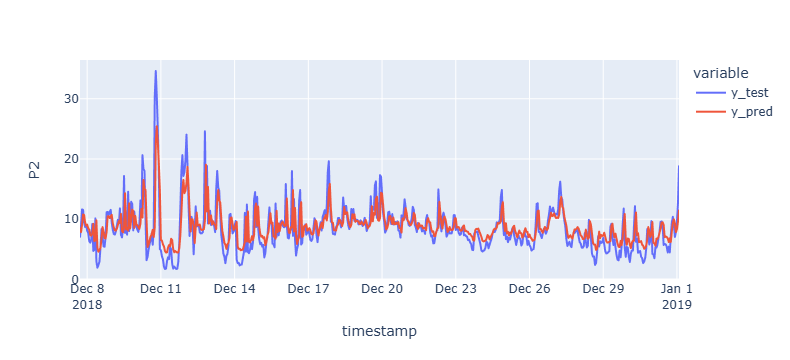

In [106]:
fig =px.line(df_pred_test,labels={"value":"P2"})
fig.show()

---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
